# Lab 9: Overfitting, underfitting, fitting polynomials, k-fold cross validation

We will look at [Ancombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet), which are four constructed datasets that appear similar statistics, including regression lines, but look different when graphed.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import KFold


%matplotlib inline

Load Anscombe's quartet in from Seaborn and look at it.  The four different datasets are indicated by the `dataset` column.

In [2]:
anscombe = sns.load_dataset("anscombe")
anscombe.head()


,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [3]:
np.unique(anscombe["dataset"])

array(['I', 'II', 'III', 'IV'], dtype=object)

To make things easier, create a new dataframe for each of the four datasets.

In [5]:
filter1 = anscombe["dataset"] == 'I'
ans1 = anscombe[filter1]
ans1.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [6]:
filter2 = anscombe["dataset"] == 'II'
ans2 = anscombe[filter2]
ans2.head()

,dataset,x,y
11,II,10.0,9.14
12,II,8.0,8.14
13,II,13.0,8.74
14,II,9.0,8.77
15,II,11.0,9.26


In [7]:
filter3 = anscombe["dataset"] == 'III'
ans3 = anscombe[filter3]
ans3.head()

,dataset,x,y
22,III,10.0,7.46
23,III,8.0,6.77
24,III,13.0,12.74
25,III,9.0,7.11
26,III,11.0,7.81


In [8]:
filter4 = anscombe["dataset"] == 'IV'
ans4 = anscombe[filter4]
ans4.head()

,dataset,x,y
33,IV,8.0,6.58
34,IV,8.0,5.76
35,IV,8.0,7.71
36,IV,8.0,8.84
37,IV,8.0,8.47


### Plot of data
Plot each of the data sets with a regression line using Seaborn.  Which regression lines fit the data?

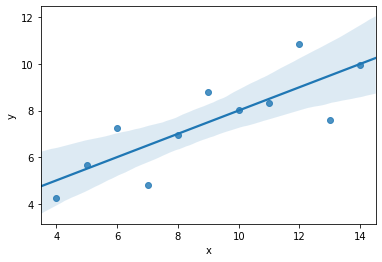

In [10]:
sns.regplot(x = "x", y = "y", data = ans1, fit_reg = True)

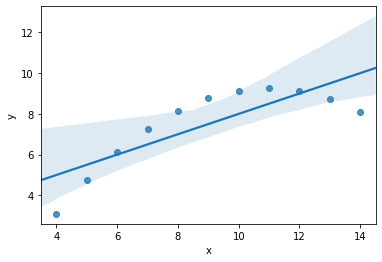

In [11]:
sns.regplot(x = "x", y = "y", data = ans2, fit_reg = True)

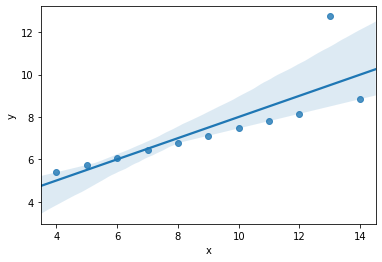

In [12]:
sns.regplot(x = "x", y = "y", data = ans3, fit_reg = True)

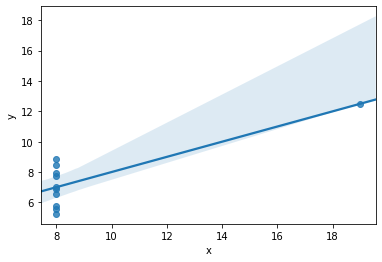

In [13]:
sns.regplot(x = "x", y = "y", data = ans4, fit_reg = True)

## R-Squared

Compute R-Squared for each regression (you will have to compute the linear model using statsmodel).  What do you notice about the R-Squared values?  How do they compare to your visual assessment of the fit in the previous section?

In [30]:
lm1 = smf.ols("y ~ x", ans1).fit()
lm1.rsquared

0.666542459508775

In [31]:
lm2 = smf.ols("y ~ x", ans2).fit()
lm2.rsquared

0.6662420337274844

In [32]:
lm3 = smf.ols("y ~ x", ans3).fit()
lm3.rsquared

0.6663240410665593

In [33]:
lm4 = smf.ols("y ~ x", ans4).fit()
lm4.rsquared

0.6667072568984653

## Overfitting and Underfitting models

Overfitting and underfitting refer to the complexity of the model relative to the data.  

First plot Anscombe's second quartet and the regression line again:

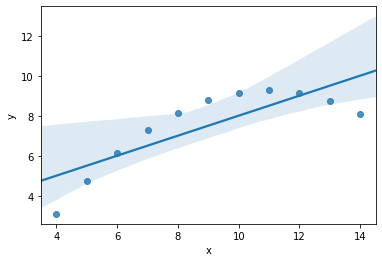

In [35]:
sns.regplot(x = "x", y = "y", data = ans2, fit_reg = True)

The above data set and linear model is an example of *underfitting* because the model is too simple compared to the data.  The linear model is not capturing the curve of the data.

We can increase the order of a model to increase it's complexity.  Add the parameter `order = 2` to your plot:

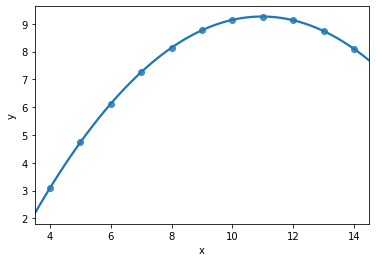

In [36]:
sns.regplot(x = "x", y = "y", data = ans2, fit_reg = True, order = 2)

What happened?

__The model more accurately explains the data.__

What happens if we increase the order to 3?

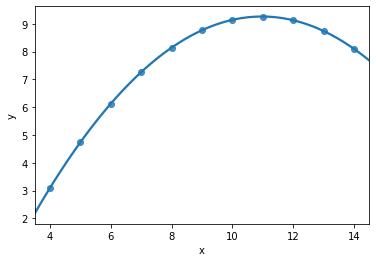

In [37]:
sns.regplot(x = "x", y = "y", data = ans2, fit_reg = True, order = 3)

__Not much happened__

## Overfitting

Use Seaborn to plot Anscombe's first dataset with the regression line.

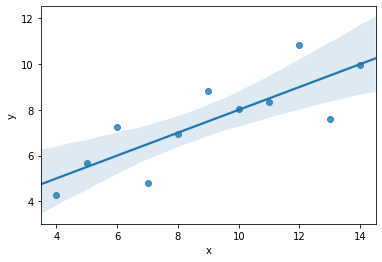

In [39]:
sns.regplot(x = "x", y = "y", data = ans1, fit_reg = True)

What happens if you add the parameter `order = 2`?

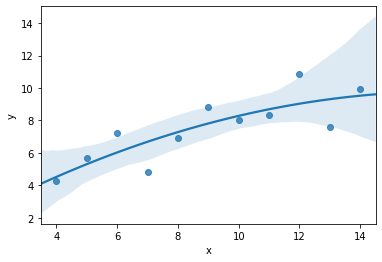

In [40]:
sns.regplot(x = "x", y = "y", data = ans1, fit_reg = True, order = 2)

What happens if you use `order = 3`?

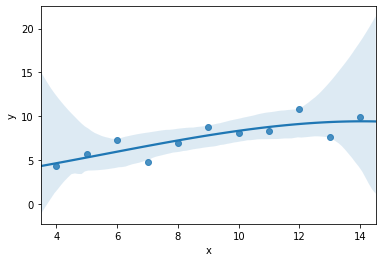

In [42]:
sns.regplot(x = "x", y = "y", data = ans1, fit_reg = True, order = 3)

This is an example of overfitting, because the equations for the lines are more complex than they need to be.

## k-fold cross validation

We will use k = 2, because our datasets are so small.  We will also do the computations manually.

Use `test_train_split()` from the last lab to split the third Anscombe data in half.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(ans3[["x"]], ans3["y"], test_size = 0.5)

Find the linear model for the training data:

In [51]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

Compute the mean squared error for the training data predictions:

In [54]:
predictions = model.predict(X_test)

mse = ((y_test - predictions)**2).mean()
mse

3.0050649197222494

Now compute the linear model for the test data:

In [55]:
model2 = lm.fit(X_test, y_test)

Compute the mean squared error for the test data:

In [57]:
predictions2 = lm.predict(X_test)

mse2 = ((y_test - predictions2)**2).mean()
mse2

2.0269133333333333

How do the two mean squared errors differ?  Does this make sense?  (You may need to plot the test and training data to answer this question.)

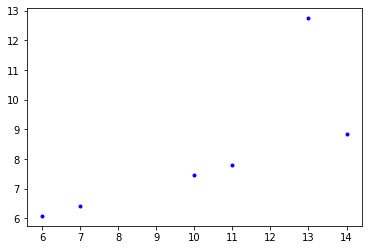

In [61]:
plt.plot(X_test, y_test, ".b")

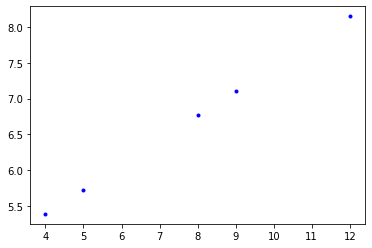

In [62]:
plt.plot(X_train, y_train, ".b")